<H1>Numerical Optimization : Practical List (Python)
<BR>Name : DHIRENDRA KUMAR PATEL
<BR>ROLL : 16027<H1>
<h3>1. WAP for finding optimal solution using Line Search method.</h3>

In [ ]:
import numpy as np

def objective_function(x):
    return x**2 + 4*x + 4

def gradient(x):
    return 2*x + 4

def line_search(initial_x, learning_rate, epsilon):
    x = initial_x
    iteration = 0

    while True:
        gradient_x = gradient(x)
        new_x = x - learning_rate * gradient_x

        # Check for convergence
        if abs(new_x - x) < epsilon:
            break

        x = new_x
        iteration += 1

    return x, objective_function(x), iteration

# Initial parameters
initial_x = 0.0
learning_rate = 0.1
epsilon = 1e-6

result_x, result_min, iterations = line_search(initial_x, learning_rate, epsilon)

print(f"Minimum value found at x = {result_x}")
print(f"Minimum objective function value = {result_min}")
print(f"Iterations: {iterations}")

Minimum value found at x = -1.9999952109514347
Minimum objective function value = 2.2934987242706484e-11
Iterations: 58


<h3>2. WAP to solve a LPP graphically.</h3>

Status: Optimal
x = 3.0
y = 6.0
Optimal Value = 21.0


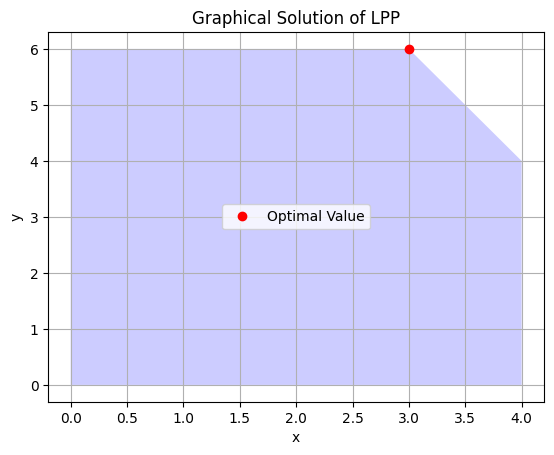

In [ ]:
!pip install pulp

import pulp
import matplotlib.pyplot as plt

lp_problem = pulp.LpProblem("LPP", pulp.LpMaximize)

x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)


lp_problem += 3 * x + 2 * y

lp_problem += x <= 4
lp_problem += y <= 6
lp_problem += 2 * x + y <= 12

lp_problem.solve()

print("Status:", pulp.LpStatus[lp_problem.status])

print("x =", x.varValue)
print("y =", y.varValue)

print("Optimal Value =", pulp.value(lp_problem.objective))

plt.plot(x.varValue, y.varValue, 'ro', label="Optimal Value")
plt.fill([0, 4, 4, 3, 0], [0, 0, 4, 6, 6], 'b', alpha=0.2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphical Solution of LPP")

plt.legend()

plt.grid(True)
plt.show()

<h3>3. WAP to compute the gradient and Hessian of the function <br>f(x) = 100(x<sub>2</sub> − x<sub>1</sub><sup>2</sup>)<sup>2</sup> + (1 − x1)<sup>2</sup></h3>


In [ ]:
import sympy as sp

x1,x2=sp.symbols ('x1 x2')
function= -100* (x2-x1**2) **2+(1-x1)**2

gradient=[sp.diff(function,x1), sp.diff(function, x2)]
hessian=[[sp.diff (gradient[0],x1), sp.diff (gradient[0],x2)], [sp.diff (gradient[1],x1), sp.diff (gradient [1], x2)]]

print("Gradient:", gradient)
print("\nHessian:", hessian)

Gradient: [400*x1*(-x1**2 + x2) + 2*x1 - 2, 200*x1**2 - 200*x2]

Hessian: [[-1200*x1**2 + 400*x2 + 2, 400*x1], [400*x1, -200]]


<h3>4. WAP to find Global Optimal Solution of a function
f(x) = −10Cos(πx − 2.2) + (x + 1.5)x algebraically</h3>

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution

def objective_function(x):
    return -10 * np.cos(np.pi * x - 2.2) + (x + 1.5) * x


bounds = [(-10, 10)]


result = differential_evolution(objective_function, bounds)


min_x = result.x
global_min_val = result.fun

print("global min x: ",min_x)
print("Global Optimal Solution:")
print(f"x = {min_x[0]}")
print(f"f(x) = {global_min_val}")

global min x:  [-1.28879776]
Global Optimal Solution:
x = -1.2887977562749167
f(x) = -10.266312448524495


<h3>5. WAP to find Global Optimal Solution of a function
f(x) = −10Cos(πx − 2.2) + (x + 1.5)x graphically</h3>

X :  [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]

Y :  [ 11.61498883  21.84665426  14.13467077  -2.71022896   1.09643462
  11.82476318   1.9578892  -10.22963916  -0.23915485   9.60862621
  -1.49850282  -7.80250918   7.254651    15.1802401    4.12203751
   4.53027808  23.22806151  28.63825872  19.15300732  26.61498883]



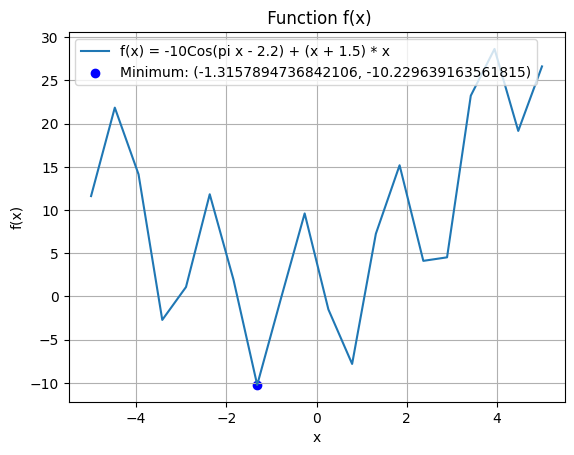

Global optimal solution is -1.3157894736842106
Optimal function value is -10.229639163561815


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define the function f(x)
def objective_function(x):
    return -10 * np.cos(np.pi * x - 2.2) + (x + 1.5) * x
# Generate x values
x = np.linspace(-5, 5, 20)
print("X : ", x)
print()

y = objective_function(x)
print("Y : ", y)
print()

plt.plot(x, y, label='f(x) = -10Cos(pi x - 2.2) + (x + 1.5) * x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(' Function f(x)')
plt.grid(True)

min_y = min(y)
min_x = x[np.argmin(y)]
plt.scatter(min_x, min_y, color='blue', label=f'Minimum: ({min_x}, {min_y})')

plt.legend()
plt.show()

print("Global optimal solution is", min_x)
print("Optimal function value is", min_y)

<h3>6. WAP to solve constraint optimization problem.</h3>

In [ ]:
from sympy import symbols, diff, solve, Matrix

x, y, l = symbols('x y lambda')
f = x**2 + y**2
g = x + y - 1

# Define the Lagrangian
L = f - l * g

# Compute partial derivatives
partials = [diff(L, var) for var in (x, y, l)]

# Solve the system of equations
solution = solve(partials, (x, y, l), dict=True)[0]

# Extract the optimal values
optimal_x = solution[x]
optimal_y = solution[y]

# Compute the Hessian matrix
# Compute the Hessian matrix using a list of lists
hessian_list = []

# Iterate over var2
for var2 in (x, y, l):
    # Initialize a row for var2
    row = []

    # Iterate over var1
    for var1 in (x, y, l):
        # Calculate the second-order partial derivative and append to the row
        row.append(diff(L.diff(var1), var2))

    # Append the row to the Hessian list
    hessian_list.append(row)

# Create an instance of the Matrix class from the list of lists
hessian_matrix = Matrix(hessian_list)

# Display the Hessian matrix
print(hessian_matrix)

hessian_determinant = hessian_matrix.det()
if hessian_determinant > 0:
    print("Stationary point is a local minimum.")
elif hessian_determinant < 0:
    print("Stationary point is a local maximum.")
else:
    print("Second-order test inconclusive (saddle point or test fails).")

# Display the result
print("Optimal solution:")
print(f"x: {optimal_x}")
print(f"y: {optimal_y}")


Matrix([[2, 0, -1], [0, 2, -1], [-1, -1, 0]])
Stationary point is a local maximum.
Optimal solution:
x: 1/2
y: 1/2
